In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import re

In [2]:
all_teams = ['POR','OKC','UTA','MIN','DEN','GSW','LAC','LAL','SAC','PHO','HOU','NOP','SAS','DAL','MEM',
             'TOR','BOS','PHI','NYK','BRK','CLE','IND','MIL','DET','CHI','MIA','WAS','CHO','ORL','ATL']

In [301]:
players = []
for team in all_teams:
    team_url = 'https://www.basketball-reference.com/teams/'+team+'/2018.html'
    res = requests.get(team_url).content.decode('utf-8')
    clean_soup = BeautifulSoup(re.sub("<!--|-->","",res), 'lxml')
    table = clean_soup.find('table', {'id': 'per_poss'})
    table = table.find('tbody')
    table2 = clean_soup.find('table', {'id': 'advanced'})
    table2 = table2.find('tbody')
    
    for row1, row2 in zip(table.find_all('tr'), table2.find_all('tr')):
        player = {}
        player['Name'] = row1.find('td').text
        player['Age'] = row1.find('td', {'class': 'center'}).text
        player['Games'] = row1.find('td', {'class': 'right', 'data-stat': 'g'}).text
        player['GS'] = row1.find('td', {'class': 'right', 'data-stat': 'gs'}).text
        player['MP'] = row1.find('td', {'class': 'right', 'data-stat': 'mp'}).text
        player['FG'] = row1.find('td', {'class': 'right', 'data-stat': 'fg_per_poss'}).text
        player['FGA'] = row1.find('td', {'class': 'right', 'data-stat': 'fga_per_poss'}).text
        player['FG%'] = row1.find('td', {'class': 'right', 'data-stat': 'fg_pct'}).text
        player['3P'] = row1.find('td', {'class': 'right', 'data-stat': 'fg3_per_poss'}).text
        player['3PA'] = row1.find('td', {'class': 'right', 'data-stat': 'fg3a_per_poss'}).text
        player['3P%'] = row1.find('td', {'class': 'right', 'data-stat': 'fg3_pct'}).text
        player['2P'] = row1.find('td', {'class': 'right', 'data-stat': 'fg2_per_poss'}).text
        player['2PA'] = row1.find('td', {'class': 'right', 'data-stat': 'fg2a_per_poss'}).text
        player['2P%'] = row1.find('td', {'class': 'right', 'data-stat': 'fg2_pct'}).text
        player['FT'] = row1.find('td', {'class': 'right', 'data-stat': 'ft_per_poss'}).text
        player['FTA'] = row1.find('td', {'class': 'right', 'data-stat': 'fta_per_poss'}).text
        player['FT%'] = row1.find('td', {'class': 'right', 'data-stat': 'ft_pct'}).text
        player['ORB'] = row1.find('td', {'class': 'right', 'data-stat': 'orb_per_poss'}).text
        player['DRB'] = row1.find('td', {'class': 'right', 'data-stat': 'drb_per_poss'}).text
        player['TRB'] = row1.find('td', {'class': 'right', 'data-stat': 'trb_per_poss'}).text
        player['AST'] = row1.find('td', {'class': 'right', 'data-stat': 'ast_per_poss'}).text
        player['STL'] = row1.find('td', {'class': 'right', 'data-stat': 'stl_per_poss'}).text
        player['BLK'] = row1.find('td', {'class': 'right', 'data-stat': 'blk_per_poss'}).text
        player['TOV'] = row1.find('td', {'class': 'right', 'data-stat': 'tov_per_poss'}).text
        player['PF'] = row1.find('td', {'class': 'right', 'data-stat': 'pf_per_poss'}).text
        player['PTS'] = row1.find('td', {'class': 'right', 'data-stat': 'pts_per_poss'}).text
        player['ORtg'] = row1.find('td', {'class': 'right', 'data-stat': 'off_rtg'}).text
        player['DRtg'] = row1.find('td', {'class': 'right', 'data-stat': 'def_rtg'}).text
        
        #player['Name'] =  row2.find('td').text
        player['PER'] = row2.find('td', {'class': 'right', 'data-stat': 'per'}).text
        player['TS%'] = row2.find('td', {'class': 'right', 'data-stat': 'ts_pct'}).text
        player['ORB%'] = row2.find('td', {'class': 'right', 'data-stat': 'orb_pct'}).text
        player['DRB%'] = row2.find('td', {'class': 'right', 'data-stat': 'drb_pct'}).text
        player['TRB%'] = row2.find('td', {'class': 'right', 'data-stat': 'trb_pct'}).text
        player['AST%'] = row2.find('td', {'class': 'right', 'data-stat': 'ast_pct'}).text
        player['STL%'] = row2.find('td', {'class': 'right', 'data-stat': 'stl_pct'}).text
        player['BLK%'] = row2.find('td', {'class': 'right', 'data-stat': 'blk_pct'}).text
        player['TOV%'] = row2.find('td', {'class': 'right', 'data-stat': 'tov_pct'}).text
        player['USG%'] = row2.find('td', {'class': 'right', 'data-stat': 'usg_pct'}).text
        player['OBPM'] = row2.find('td', {'class': 'right', 'data-stat': 'obpm'}).text
        player['DBPM'] = row2.find('td', {'class': 'right', 'data-stat': 'dbpm'}).text
        player['BPM'] = row2.find('td', {'class': 'right', 'data-stat': 'bpm'}).text
        
        players.append(player)
        
pd.DataFrame(players)

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,Name,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
0,8.1,.465,17.5,3.2,.397,8.1,4.6,15.8,26,0.6,1.0,0.4,-1.0,4.6,9.9,109,11.4,.443,25.6,3.6,.836,4.3,81,81,2923,CJ McCollum,1.4,0.9,2.0,108,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,.536,26.5
1,7.3,.501,14.6,4.2,.361,11.7,9.0,30.9,27,0.5,0.8,6.7,-1.0,4.9,10.6,109,11.6,.439,26.4,9.2,.916,10.0,73,73,2670,Damian Lillard,7.7,1.2,2.6,120,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,.594,30.6
2,11.4,.508,22.5,0.0,.000,0.2,3.4,11.7,23,2.6,4.3,0.3,2.8,12.4,26.9,101,11.4,.505,22.7,4.1,.630,6.5,79,79,2088,Jusuf Nurkic,-2.6,4.5,10.0,102,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,.528,26.4
3,2.5,.432,5.8,3.0,.369,8.1,2.0,5.8,27,1.0,1.6,1.1,1.9,10.3,22.3,104,5.5,.395,14.0,1.4,.738,1.9,67,69,2072,Al-Farouq Aminu,-0.8,2.3,5.2,105,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,.522,14.8
4,5.3,.485,10.9,1.0,.318,3.2,4.2,12.4,29,0.7,1.2,-1.8,0.6,5.2,11.4,109,6.3,.447,14.1,2.2,.850,2.6,40,79,2034,Evan Turner,-2.4,0.7,1.6,103,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,.520,15.6
5,4.6,.450,10.1,2.7,.376,7.1,4.9,14.6,26,0.5,0.7,0.2,0.3,4.7,10.1,106,7.2,.420,17.2,3.8,.841,4.5,10,74,1535,Shabazz Napier,-0.2,0.8,1.9,107,14.2,2.7,20.9,2.6,2.6,2.9,13.2,5.5,6.0,.544,19.5
6,3.0,.506,6.0,2.5,.352,7.0,3.0,8.7,25,0.7,1.2,-1.3,-0.4,4.2,9.1,110,5.5,.423,13.0,1.2,.841,1.5,5,82,1488,Pat Connaughton,-0.9,1.2,2.7,110,9.3,4.0,14.7,0.8,0.8,1.4,9.5,5.4,5.9,.539,13.4
7,5.7,.584,9.8,0.0,.000,0.0,1.4,3.9,28,1.8,2.9,0.0,1.8,13.3,28.8,103,5.7,.582,9.9,2.5,.667,3.8,0,78,1471,Ed Davis,-1.8,6.2,13.7,121,15.5,6.4,14.0,1.1,1.1,2.2,16.2,19.4,21.3,.607,12.1
8,3.9,.547,7.0,1.9,.415,4.6,2.1,6.0,24,1.7,2.8,1.8,2.0,4.6,9.9,106,5.8,.495,11.7,1.7,.712,2.3,36,59,1264,Maurice Harkless,-0.2,1.8,4.0,117,12.6,4.1,15.2,1.9,1.9,1.6,11.0,6.4,7.0,.596,12.6
9,3.8,.455,8.4,1.7,.310,5.4,2.5,7.1,20,1.5,2.4,-3.2,0.9,8.4,18.2,107,5.5,.398,13.8,1.3,.643,2.0,1,66,1045,Zach Collins,-4.1,2.1,4.7,93,7.5,6.3,13.9,0.8,0.8,2.8,15.9,10.5,11.5,.475,15.4


In [302]:
season17_18 = pd.DataFrame(players)

In [303]:
season17_18.shape

(605, 41)

In [96]:
season17_18.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,Name,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
0,8.1,.465,17.5,3.2,.397,8.1,4.6,15.8,26,0.6,1.0,0.4,-1.0,4.6,9.9,109,11.4,.443,25.6,3.6,.836,4.3,81,81,2923,CJ McCollum,1.4,0.9,2.0,108,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,.536,26.5
1,7.3,.501,14.6,4.2,.361,11.7,9.0,30.9,27,0.5,0.8,6.7,-1.0,4.9,10.6,109,11.6,.439,26.4,9.2,.916,10.0,73,73,2670,Damian Lillard,7.7,1.2,2.6,120,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,.594,30.6
2,11.4,.508,22.5,0.0,.000,0.2,3.4,11.7,23,2.6,4.3,0.3,2.8,12.4,26.9,101,11.4,.505,22.7,4.1,.630,6.5,79,79,2088,Jusuf Nurkic,-2.6,4.5,10.0,102,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,.528,26.4
3,2.5,.432,5.8,3.0,.369,8.1,2.0,5.8,27,1.0,1.6,1.1,1.9,10.3,22.3,104,5.5,.395,14.0,1.4,.738,1.9,67,69,2072,Al-Farouq Aminu,-0.8,2.3,5.2,105,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,.522,14.8
4,5.3,.485,10.9,1.0,.318,3.2,4.2,12.4,29,0.7,1.2,-1.8,0.6,5.2,11.4,109,6.3,.447,14.1,2.2,.850,2.6,40,79,2034,Evan Turner,-2.4,0.7,1.6,103,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,.520,15.6


In [304]:
season17_18.set_index('Name', inplace=True)

In [306]:
season17_18.shape

(605, 40)

In [305]:
season17_18

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,.465,17.5,3.2,.397,8.1,4.6,15.8,26,0.6,1.0,0.4,-1.0,4.6,9.9,109,11.4,.443,25.6,3.6,.836,4.3,81,81,2923,1.4,0.9,2.0,108,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,.536,26.5
Damian Lillard,7.3,.501,14.6,4.2,.361,11.7,9.0,30.9,27,0.5,0.8,6.7,-1.0,4.9,10.6,109,11.6,.439,26.4,9.2,.916,10.0,73,73,2670,7.7,1.2,2.6,120,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,.594,30.6
Jusuf Nurkic,11.4,.508,22.5,0.0,.000,0.2,3.4,11.7,23,2.6,4.3,0.3,2.8,12.4,26.9,101,11.4,.505,22.7,4.1,.630,6.5,79,79,2088,-2.6,4.5,10.0,102,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,.528,26.4
Al-Farouq Aminu,2.5,.432,5.8,3.0,.369,8.1,2.0,5.8,27,1.0,1.6,1.1,1.9,10.3,22.3,104,5.5,.395,14.0,1.4,.738,1.9,67,69,2072,-0.8,2.3,5.2,105,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,.522,14.8
Evan Turner,5.3,.485,10.9,1.0,.318,3.2,4.2,12.4,29,0.7,1.2,-1.8,0.6,5.2,11.4,109,6.3,.447,14.1,2.2,.850,2.6,40,79,2034,-2.4,0.7,1.6,103,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,.520,15.6
Shabazz Napier,4.6,.450,10.1,2.7,.376,7.1,4.9,14.6,26,0.5,0.7,0.2,0.3,4.7,10.1,106,7.2,.420,17.2,3.8,.841,4.5,10,74,1535,-0.2,0.8,1.9,107,14.2,2.7,20.9,2.6,2.6,2.9,13.2,5.5,6.0,.544,19.5
Pat Connaughton,3.0,.506,6.0,2.5,.352,7.0,3.0,8.7,25,0.7,1.2,-1.3,-0.4,4.2,9.1,110,5.5,.423,13.0,1.2,.841,1.5,5,82,1488,-0.9,1.2,2.7,110,9.3,4.0,14.7,0.8,0.8,1.4,9.5,5.4,5.9,.539,13.4
Ed Davis,5.7,.584,9.8,0.0,.000,0.0,1.4,3.9,28,1.8,2.9,0.0,1.8,13.3,28.8,103,5.7,.582,9.9,2.5,.667,3.8,0,78,1471,-1.8,6.2,13.7,121,15.5,6.4,14.0,1.1,1.1,2.2,16.2,19.4,21.3,.607,12.1
Maurice Harkless,3.9,.547,7.0,1.9,.415,4.6,2.1,6.0,24,1.7,2.8,1.8,2.0,4.6,9.9,106,5.8,.495,11.7,1.7,.712,2.3,36,59,1264,-0.2,1.8,4.0,117,12.6,4.1,15.2,1.9,1.9,1.6,11.0,6.4,7.0,.596,12.6


In [37]:
# season17_18 = pd.merge(per_poss100_17_18, advanced_17_18, on='Name')

In [101]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 700) # want to see more rows and columns

In [102]:
season17_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, CJ McCollum to Jeremy Evans
Data columns (total 40 columns):
2P       605 non-null object
2P%      605 non-null object
2PA      605 non-null object
3P       605 non-null object
3P%      605 non-null object
3PA      605 non-null object
AST      605 non-null object
AST%     605 non-null object
Age      605 non-null object
BLK      605 non-null object
BLK%     605 non-null object
BPM      605 non-null object
DBPM     605 non-null object
DRB      605 non-null object
DRB%     605 non-null object
DRtg     605 non-null object
FG       605 non-null object
FG%      605 non-null object
FGA      605 non-null object
FT       605 non-null object
FT%      605 non-null object
FTA      605 non-null object
GS       605 non-null object
Games    605 non-null object
MP       605 non-null object
OBPM     605 non-null object
ORB      605 non-null object
ORB%     605 non-null object
ORtg     605 non-null object
PER      605 non-null object
PF       60

In [107]:
season17_18.isnull().sum()

2P        0
2P%      17
2PA       0
3P        0
3P%      60
3PA       0
AST       0
AST%      0
Age       0
BLK       0
BLK%      0
BPM       0
DBPM      0
DRB       0
DRB%      0
DRtg      0
FG        0
FG%       4
FGA       0
FT        0
FT%      55
FTA       0
GS        0
Games     0
MP        0
OBPM      0
ORB       0
ORB%      0
ORtg      2
PER       0
PF        0
PTS       0
STL       0
STL%      0
TOV       0
TOV%      4
TRB       0
TRB%      0
TS%       4
USG%      0
dtype: int64

In [106]:
season17_18 = season17_18.replace('', np.nan) # changing the strings to nan

In [43]:
season17_18.columns

Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 'Age', 'BLK', 'DRB',
       'DRtg', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'GS', 'Games', 'MP',
       'ORB', 'ORtg', 'PF', 'PTS', 'STL', 'TOV', 'TRB', 'AST%', 'BLK%', 'BPM',
       'DBPM', 'DRB%', 'OBPM', 'ORB%', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%',
       'USG%'],
      dtype='object')

In [58]:
season17_18.columns.tolist()

['2P',
 '2P%',
 '2PA',
 '3P',
 '3P%',
 '3PA',
 'AST',
 'Age',
 'BLK',
 'DRB',
 'DRtg',
 'FG',
 'FG%',
 'FGA',
 'FT',
 'FT%',
 'FTA',
 'GS',
 'Games',
 'MP',
 'ORB',
 'ORtg',
 'PF',
 'PTS',
 'STL',
 'TOV',
 'TRB',
 'AST%',
 'BLK%',
 'BPM',
 'DBPM',
 'DRB%',
 'OBPM',
 'ORB%',
 'PER',
 'STL%',
 'TOV%',
 'TRB%',
 'TS%',
 'USG%']

In [108]:
## changing all the columns to floats
for column in season17_18.columns.tolist():
    season17_18[column] = season17_18[column].astype(float)

In [109]:
season17_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, CJ McCollum to Jeremy Evans
Data columns (total 40 columns):
2P       605 non-null float64
2P%      588 non-null float64
2PA      605 non-null float64
3P       605 non-null float64
3P%      545 non-null float64
3PA      605 non-null float64
AST      605 non-null float64
AST%     605 non-null float64
Age      605 non-null float64
BLK      605 non-null float64
BLK%     605 non-null float64
BPM      605 non-null float64
DBPM     605 non-null float64
DRB      605 non-null float64
DRB%     605 non-null float64
DRtg     605 non-null float64
FG       605 non-null float64
FG%      601 non-null float64
FGA      605 non-null float64
FT       605 non-null float64
FT%      550 non-null float64
FTA      605 non-null float64
GS       605 non-null float64
Games    605 non-null float64
MP       605 non-null float64
OBPM     605 non-null float64
ORB      605 non-null float64
ORB%     605 non-null float64
ORtg     603 non-null float64
PER      60

In [110]:
season17_18.replace(np.nan, 0, inplace =True) ## changing nan to 0

In [112]:
season17_18.corr()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
2P,1.000000,0.536289,0.844424,-0.251043,-0.178794,-0.367269,0.095007,0.169139,-0.050402,0.313790,0.315433,0.217618,0.121254,0.360873,0.372384,-0.269012,0.684901,0.546822,0.499392,0.363466,0.077870,0.411494,0.264771,0.168529,0.230206,0.196017,0.439447,0.438689,0.255451,0.483294,0.162989,0.516055,0.079362,0.079517,0.340136,-0.005080,0.452776,0.451866,0.307041,0.567271
2P%,0.536289,1.000000,0.210325,-0.207984,-0.099059,-0.235688,-0.018125,0.007622,0.036892,0.250794,0.246739,0.316891,0.254544,0.162826,0.169816,-0.193336,0.312032,0.650145,0.007324,0.103983,0.208551,0.133107,0.149765,0.235910,0.190887,0.243835,0.259641,0.261422,0.381540,0.318931,0.120400,0.194769,0.077333,0.077456,0.094318,0.084964,0.229283,0.229268,0.473598,0.050116
2PA,0.844424,0.210325,1.000000,-0.249007,-0.167471,-0.359550,0.159464,0.229114,-0.056235,0.217677,0.221469,-0.023670,-0.002753,0.255233,0.266885,-0.141727,0.550472,0.243874,0.652675,0.367778,0.063743,0.408654,0.235168,0.104315,0.188883,-0.026363,0.369822,0.367859,0.017589,0.254303,0.050367,0.419348,0.033067,0.033163,0.365208,-0.028176,0.344935,0.342906,0.046709,0.699368
3P,-0.251043,-0.207984,-0.249007,1.000000,0.569943,0.728711,0.035206,0.061885,0.045273,-0.208636,-0.208662,0.422673,-0.336849,-0.249776,-0.253605,0.199118,0.533247,0.175190,0.356466,0.030219,0.080415,-0.050625,0.061883,0.045200,0.098883,0.682783,-0.327018,-0.327875,0.380294,0.538914,-0.207744,0.672985,-0.105534,-0.105692,-0.046048,-0.156595,-0.323055,-0.323149,0.458060,0.283039
3P%,-0.178794,-0.099059,-0.167471,0.569943,1.000000,0.405448,0.169194,0.194329,0.043754,-0.186318,-0.190468,0.335824,-0.141743,-0.245929,-0.249763,0.227557,0.272338,0.188737,0.171067,0.123240,0.341594,0.040048,0.180417,0.246610,0.272510,0.475381,-0.380015,-0.382378,0.328729,0.300086,-0.205534,0.384924,-0.091521,-0.091693,-0.022746,-0.102543,-0.342254,-0.344072,0.446155,0.147051
3PA,-0.367269,-0.235688,-0.359550,0.728711,0.405448,1.000000,0.023548,0.048627,0.047202,-0.321234,-0.321126,0.005776,-0.461520,-0.102425,-0.120953,0.137941,0.227310,-0.219540,0.472264,-0.026213,0.055323,-0.128163,0.024996,-0.019345,0.059519,0.251236,-0.466055,-0.468195,-0.017595,0.092283,-0.301536,0.361274,-0.093071,-0.093235,-0.097346,-0.267297,-0.270095,-0.266533,0.047690,0.357211
AST,0.095007,-0.018125,0.159464,0.035206,0.169194,0.023548,1.000000,0.987568,0.102911,-0.186682,-0.189290,0.199617,0.031347,-0.209558,-0.212358,0.099624,0.110478,-0.018301,0.169495,0.222162,0.239940,0.193462,0.208645,0.159147,0.241857,0.221947,-0.279861,-0.279531,0.163445,0.166488,-0.130503,0.141392,0.111542,0.111517,0.327364,0.198192,-0.273443,-0.273218,0.029422,0.252384
AST%,0.169139,0.007622,0.229114,0.061885,0.194329,0.048627,0.987568,1.000000,0.096635,-0.174105,-0.176470,0.232053,0.027193,-0.181246,-0.183144,0.090279,0.195351,0.021117,0.255653,0.282111,0.255982,0.250536,0.249868,0.179228,0.279724,0.262949,-0.263665,-0.264178,0.173394,0.220235,-0.150713,0.224767,0.104184,0.104175,0.361165,0.177255,-0.245531,-0.245935,0.067795,0.342371
Age,-0.050402,0.036892,-0.056235,0.045273,0.043754,0.047202,0.102911,0.096635,1.000000,-0.043693,-0.044442,0.056629,-0.005732,-0.055145,-0.056461,0.081065,-0.009209,0.044574,-0.014615,0.014842,0.121926,-0.010652,0.071841,0.080448,0.082956,0.070666,-0.060257,-0.056892,0.027798,0.008963,-0.058656,0.009471,-0.078036,-0.078208,0.010238,0.055548,-0.066843,-0.063307,0.066112,-0.008700
BLK,0.313790,0.250794,0.217677,-0.208636,-0.186318,-0.321234,-0.186682,-0.174105,-0.043693,1.000000,0.997663,0.241147,0.488033,0.333264,0.339028,-0.397809,0.116954,0.293128,-0.055125,0.143109,0.062143,0.203055,0.095070,0.149808,0.073509,0.029812,0.455603,0.460381,0.136268,0.236700,0.165108,0.061213,-0.020518,-0.020469,0.068763,0.096788,0.439038,0.439673,0.163928,0.004831


In [113]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [114]:
season17_18['MP'].value_counts()

6.0       5
4.0       5
38.0      4
7.0       4
9.0       4
115.0     3
35.0      3
1134.0    3
118.0     3
2.0       3
25.0      3
5.0       3
13.0      3
1.0       3
8.0       3
45.0      3
15.0      3
80.0      3
235.0     2
918.0     2
11.0      2
1643.0    2
1365.0    2
2034.0    2
189.0     2
418.0     2
233.0     2
1150.0    2
18.0      2
1653.0    2
225.0     2
669.0     2
53.0      2
2464.0    2
1975.0    2
214.0     2
33.0      2
1391.0    2
290.0     2
17.0      2
551.0     2
536.0     2
480.0     2
64.0      2
72.0      2
61.0      2
40.0      2
406.0     2
2310.0    2
75.0      2
28.0      2
3.0       2
205.0     2
32.0      2
1706.0    2
19.0      2
139.0     2
1143.0    2
1850.0    2
1542.0    2
1622.0    2
740.0     2
216.0     2
807.0     2
1084.0    1
1525.0    1
629.0     1
2501.0    1
1359.0    1
1657.0    1
2029.0    1
2287.0    1
2197.0    1
514.0     1
209.0     1
1847.0    1
43.0      1
805.0     1
1463.0    1
743.0     1
2432.0    1
2018.0    1
1968.0    1
1686

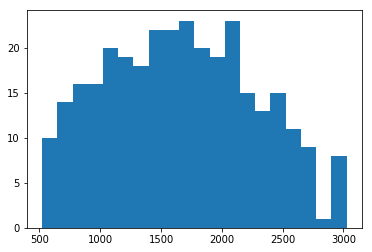

In [121]:
plt.hist(season17_18['MP'], bins=20);

In [32]:
# would like to take players that are less than 500 minutes played out.

In [116]:
season17_18 = season17_18[season17_18['MP']>500] #took out players that played less than 500min
# they were either injured or didn't play enough for my model

In [117]:
season17_18.shape

(361, 40)

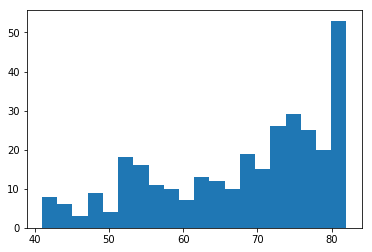

In [129]:
plt.hist(season17_18['Games'], bins=20);

In [119]:
season17_18 = season17_18[season17_18['Games']>40]# going to take out players that play less than 40 games/ looked at most
# of the players and they were mostly injured throughout the season.

In [123]:
season17_18.shape # checking shape

(314, 40)

In [131]:
# plt.hist(season17_18['Age'], bins=20);
# interesting most players from 2017-2018 were from 20-30
# Age can be taken out cause age shouldn't be a factor for this model

In [125]:
season17_18.drop(columns='Age', inplace=True)

In [126]:
season17_18.head() ## took out age 

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,81.0,81.0,2923.0,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,30.9,0.5,0.8,6.7,-1.0,4.9,10.6,109.0,11.6,0.439,26.4,9.2,0.916,10.0,73.0,73.0,2670.0,7.7,1.2,2.6,120.0,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,0.594,30.6
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,11.7,2.6,4.3,0.3,2.8,12.4,26.9,101.0,11.4,0.505,22.7,4.1,0.630,6.5,79.0,79.0,2088.0,-2.6,4.5,10.0,102.0,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,0.528,26.4
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,1.0,1.6,1.1,1.9,10.3,22.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,67.0,69.0,2072.0,-0.8,2.3,5.2,105.0,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,0.522,14.8
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,12.4,0.7,1.2,-1.8,0.6,5.2,11.4,109.0,6.3,0.447,14.1,2.2,0.850,2.6,40.0,79.0,2034.0,-2.4,0.7,1.6,103.0,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,0.520,15.6


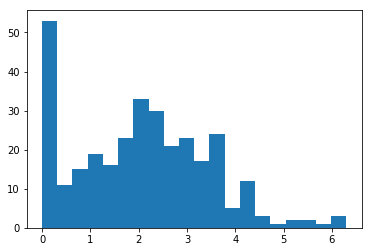

In [127]:
plt.hist(season17_18['3P'], bins=20);

In [128]:
## saving csv
season17_18.to_csv('./season17_18')

In [76]:
season17_18[season17_18['3P']>=4]

,2P,2P%,2PA,3P,3P%,3PA,AST,BLK,DRB,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,ORB,ORtg,PF,PTS,STL,TOV,TRB,AST%,BLK%,BPM,DBPM,DRB%,OBPM,ORB%,PER,STL%,TOV%,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,0.5,4.9,109.0,11.6,0.439,26.4,9.2,0.916,10.0,73.0,73.0,2670.0,1.2,120.0,2.2,36.6,1.4,3.8,6.1,30.9,0.8,6.7,-1.0,10.6,7.7,2.6,25.2,1.4,11.1,6.6,0.594,30.6
Paul George,5.7,0.454,12.5,4.2,0.401,10.5,4.5,0.7,6.4,106.0,9.9,0.430,23.0,5.8,0.822,7.1,79.0,79.0,2891.0,1.2,112.0,4.0,29.8,2.8,3.6,7.7,14.5,1.2,2.6,0.0,14.9,2.5,2.7,18.7,2.8,12.2,8.6,0.570,25.7
Joe Ingles,2.5,0.516,4.9,4.0,0.440,9.0,7.6,0.4,6.2,106.0,6.5,0.467,14.0,1.3,0.795,1.6,81.0,82.0,2578.0,0.5,115.0,3.5,18.3,1.8,3.1,6.7,22.9,0.7,3.1,1.0,13.9,2.1,1.1,14.4,1.8,17.4,7.6,0.623,15.9
Klay Thompson,6.7,0.526,12.7,4.4,0.440,10.0,3.6,0.7,4.7,111.0,11.1,0.488,22.7,1.6,0.837,1.9,73.0,73.0,2506.0,0.6,110.0,2.3,28.1,1.1,2.5,5.3,11.2,1.1,-0.6,-2.4,10.3,1.8,1.5,16.1,1.1,9.5,6.2,0.598,23.7
Stephen Curry,6.4,0.595,10.7,6.3,0.423,14.8,9.2,0.2,6.6,108.0,12.6,0.495,25.5,8.2,0.921,8.9,51.0,51.0,1631.0,1.1,125.0,3.4,39.8,2.4,4.5,7.7,30.3,0.4,8.6,-1.3,14.4,9.9,2.7,28.2,2.4,13.3,9.0,0.675,31.0
Nick Young,2.7,0.481,5.6,4.3,0.377,11.3,1.2,0.2,3.6,112.0,7.0,0.412,16.9,1.9,0.862,2.2,8.0,80.0,1393.0,0.7,106.0,3.5,20.1,1.3,1.3,4.3,3.5,0.4,-3.7,-3.4,7.9,-0.2,1.7,10.0,1.3,7.2,5.0,0.562,17.6
Buddy Hield,6.0,0.457,13.1,4.4,0.431,10.2,3.9,0.5,6.3,111.0,10.4,0.446,23.3,1.8,0.877,2.0,12.0,80.0,2024.0,1.4,104.0,3.7,27.0,2.1,3.1,7.7,12.8,1.0,-0.2,-1.4,14.8,1.2,3.0,16.1,2.1,11.3,8.6,0.557,24.3
Troy Daniels,1.4,0.419,3.5,5.4,0.400,13.5,1.4,0.1,3.4,117.0,6.8,0.403,17.0,1.7,0.875,1.9,15.0,79.0,1622.0,0.4,109.0,4.0,20.7,0.8,1.7,3.7,4.5,0.2,-2.9,-3.6,7.7,0.7,0.8,9.8,0.8,8.5,4.2,0.583,17.2
James Harden,7.4,0.531,14.0,5.1,0.367,13.9,12.2,1.0,6.7,105.0,12.6,0.449,27.9,12.0,0.858,14.0,72.0,72.0,2551.0,0.8,120.0,3.3,42.3,2.4,6.1,7.5,45.1,1.7,10.9,1.3,15.2,9.6,1.8,29.8,2.4,15.1,8.6,0.619,36.1


In [132]:
season17_18.columns

Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 'AST%', 'BLK', 'BLK%',
       'BPM', 'DBPM', 'DRB', 'DRB%', 'DRtg', 'FG', 'FG%', 'FGA', 'FT', 'FT%',
       'FTA', 'GS', 'Games', 'MP', 'OBPM', 'ORB', 'ORB%', 'ORtg', 'PER', 'PF',
       'PTS', 'STL', 'STL%', 'TOV', 'TOV%', 'TRB', 'TRB%', 'TS%', 'USG%'],
      dtype='object')

In [134]:
## Reference
## ORtg = Offensive Rating
## DRtg = Defensive Rating
## all stats that are not advanced stats are based off of per 100 poss

## Advanced Stats 
## PER = Player Effieciancy Rating
## TS% = True Shooting %
## ORB% = Percentage of Offensive Rebounds while they were on the floor
## DRB% = '' Defensive Rebounds%
## TRB% = '' Total Rebounds%
## AST% = Assist%
## STL% = Steal%
## BLK% = Block%
## TOV% = Turnover%
## USG% = Usage Percentage
## OBPM = Offensive Box Plus/Minus per 100 possession
## DBPM = Defensve ''
## BPM = Box Plus/ Minus

In [135]:
## going to take out MP, GS, Games. Don't need.

In [137]:
season17_18

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,81.0,81.0,2923.0,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,30.9,0.5,0.8,6.7,-1.0,4.9,10.6,109.0,11.6,0.439,26.4,9.2,0.916,10.0,73.0,73.0,2670.0,7.7,1.2,2.6,120.0,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,0.594,30.6
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,11.7,2.6,4.3,0.3,2.8,12.4,26.9,101.0,11.4,0.505,22.7,4.1,0.630,6.5,79.0,79.0,2088.0,-2.6,4.5,10.0,102.0,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,0.528,26.4
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,1.0,1.6,1.1,1.9,10.3,22.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,67.0,69.0,2072.0,-0.8,2.3,5.2,105.0,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,0.522,14.8
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,12.4,0.7,1.2,-1.8,0.6,5.2,11.4,109.0,6.3,0.447,14.1,2.2,0.850,2.6,40.0,79.0,2034.0,-2.4,0.7,1.6,103.0,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,0.520,15.6
Shabazz Napier,4.6,0.450,10.1,2.7,0.376,7.1,4.9,14.6,0.5,0.7,0.2,0.3,4.7,10.1,106.0,7.2,0.420,17.2,3.8,0.841,4.5,10.0,74.0,1535.0,-0.2,0.8,1.9,107.0,14.2,2.7,20.9,2.6,2.6,2.9,13.2,5.5,6.0,0.544,19.5
Pat Connaughton,3.0,0.506,6.0,2.5,0.352,7.0,3.0,8.7,0.7,1.2,-1.3,-0.4,4.2,9.1,110.0,5.5,0.423,13.0,1.2,0.841,1.5,5.0,82.0,1488.0,-0.9,1.2,2.7,110.0,9.3,4.0,14.7,0.8,0.8,1.4,9.5,5.4,5.9,0.539,13.4
Ed Davis,5.7,0.584,9.8,0.0,0.000,0.0,1.4,3.9,1.8,2.9,0.0,1.8,13.3,28.8,103.0,5.7,0.582,9.9,2.5,0.667,3.8,0.0,78.0,1471.0,-1.8,6.2,13.7,121.0,15.5,6.4,14.0,1.1,1.1,2.2,16.2,19.4,21.3,0.607,12.1
Maurice Harkless,3.9,0.547,7.0,1.9,0.415,4.6,2.1,6.0,1.7,2.8,1.8,2.0,4.6,9.9,106.0,5.8,0.495,11.7,1.7,0.712,2.3,36.0,59.0,1264.0,-0.2,1.8,4.0,117.0,12.6,4.1,15.2,1.9,1.9,1.6,11.0,6.4,7.0,0.596,12.6


In [140]:
X = season17_18.drop(['GS', 'Games', 'MP'], axis=1)

In [142]:
X.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,30.9,0.5,0.8,6.7,-1.0,4.9,10.6,109.0,11.6,0.439,26.4,9.2,0.916,10.0,7.7,1.2,2.6,120.0,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,0.594,30.6
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,11.7,2.6,4.3,0.3,2.8,12.4,26.9,101.0,11.4,0.505,22.7,4.1,0.630,6.5,-2.6,4.5,10.0,102.0,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,0.528,26.4
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,1.0,1.6,1.1,1.9,10.3,22.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,-0.8,2.3,5.2,105.0,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,0.522,14.8
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,12.4,0.7,1.2,-1.8,0.6,5.2,11.4,109.0,6.3,0.447,14.1,2.2,0.850,2.6,-2.4,0.7,1.6,103.0,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,0.520,15.6


In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [146]:
from sklearn.decomposition import PCA

In [187]:
pca = PCA(n_components=15)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.9930966092457751


In [186]:
var_exp = pca.explained_variance_ratio_
print("Explained Variance: ", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Explained Variance: ", cum_var_exp)

Explained Variance:  [3.41401440e-01 2.40299433e-01 1.05129494e-01 8.24929506e-02
 5.24217203e-02 3.78339463e-02 2.83093210e-02 2.22153825e-02
 1.99047749e-02 1.75778313e-02 1.34261569e-02 1.05990043e-02
 9.00876121e-03 7.80690180e-03 4.66949129e-03 3.48210598e-03
 1.16227421e-03 6.24882849e-04 5.14348590e-04 3.05096809e-04
 1.86895487e-04 1.69523113e-04 1.54874154e-04 1.09044633e-04
 6.82689475e-05 4.95216447e-05 2.52900569e-05 1.91632897e-05
 1.46884958e-05 4.79957520e-06 3.92052407e-06 3.31882274e-06
 2.36137958e-06 1.96616200e-06 1.04602534e-06 2.22764821e-33]
Cumulative Explained Variance:  [0.34140144 0.58170087 0.68683037 0.76932332 0.82174504 0.85957898
 0.88788831 0.91010369 0.93000846 0.94758629 0.96101245 0.97161145
 0.98062022 0.98842712 0.99309661 0.99657872 0.99774099 0.99836587
 0.99888022 0.99918532 0.99937221 0.99954174 0.99969661 0.99980566
 0.99987392 0.99992345 0.99994874 0.9999679  0.99998259 0.99998739
 0.99999131 0.99999463 0.99999699 0.99999895 1.         1.    

In [159]:
from sklearn.cluster import KMeans

In [166]:
from scipy.spatial.distance import cdist

In [188]:
wss = []
K = range(5,13)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X)
    wss.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), 
                          axis=1)) / X.shape[0])

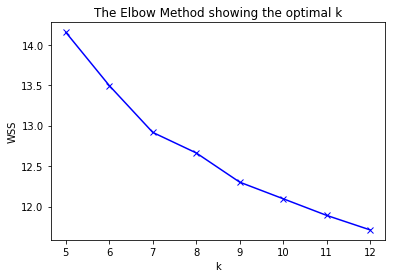

In [189]:
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [224]:
wss = []
K = range(5,13)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_pca)
    kmeanModel.fit(X)
    wss.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), 
                          axis=1)) / X.shape[0])

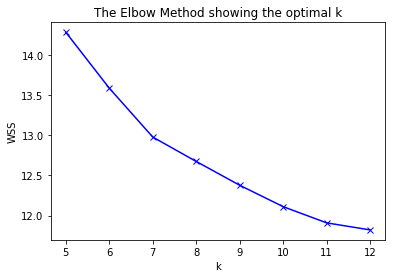

In [225]:
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

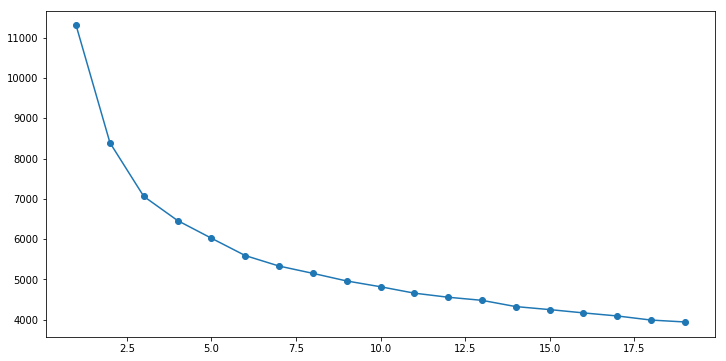

In [212]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

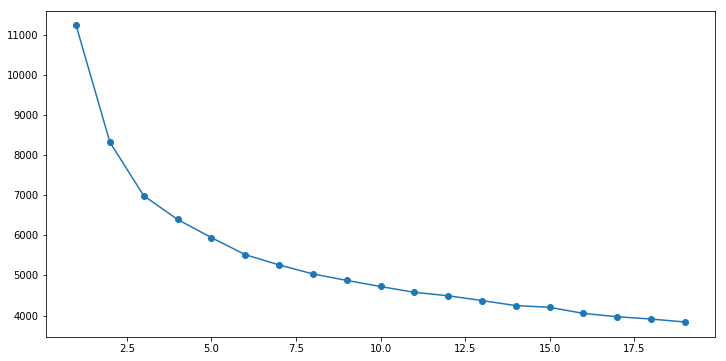

In [213]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_pca)
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [193]:
from collections import Counter

In [194]:
kmeans= KMeans(n_clusters=8)
kmeans.fit(X_pca)
X['cluster_scaled'] = kmeans.labels_
Counter(kmeans.labels_)

Counter({6: 51, 0: 22, 3: 28, 7: 41, 1: 43, 4: 49, 2: 42, 5: 38})

In [204]:
X[X['cluster_scaled']==4]

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%,cluster_scaled
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pat Connaughton,3.0,0.506,6.0,2.5,0.352,7.0,3.0,8.7,0.7,1.2,-1.3,-0.4,4.2,9.1,110.0,5.5,0.423,13.0,1.2,0.841,1.5,-0.9,1.2,2.7,110.0,9.3,4.0,14.7,0.8,0.8,1.4,9.5,5.4,5.9,0.539,13.4,4
Alex Abrines,1.4,0.443,3.1,3.7,0.380,9.7,1.2,3.4,0.4,0.6,-2.2,-1.7,3.9,8.9,110.0,5.0,0.395,12.7,1.7,0.848,2.0,-0.5,1.1,2.5,116.0,9.0,5.4,15.4,1.7,1.7,1.1,7.4,5.0,5.6,0.567,12.7,4
Terrance Ferguson,2.0,0.612,3.2,2.6,0.333,7.8,1.2,3.4,0.7,1.2,-2.5,-1.3,1.8,4.2,111.0,4.6,0.414,11.0,0.6,0.900,0.7,-1.2,1.2,2.7,115.0,7.4,5.4,12.3,1.6,1.6,0.7,6.0,3.1,3.4,0.545,10.4,4
Joe Ingles,2.5,0.516,4.9,4.0,0.440,9.0,7.6,22.9,0.4,0.7,3.1,1.0,6.2,13.9,106.0,6.5,0.467,14.0,1.3,0.795,1.6,2.1,0.5,1.1,115.0,14.4,3.5,18.3,1.8,1.8,3.1,17.4,6.7,7.6,0.623,15.9,4
Wilson Chandler,4.1,0.501,8.1,1.9,0.358,5.2,3.4,9.5,0.8,1.4,-0.9,-0.4,6.3,14.1,113.0,5.9,0.445,13.3,1.9,0.772,2.4,-0.5,2.2,4.9,110.0,11.0,3.3,15.6,0.9,0.9,1.9,11.9,8.4,9.6,0.542,14.3,4
Nick Young,2.7,0.481,5.6,4.3,0.377,11.3,1.2,3.5,0.2,0.4,-3.7,-3.4,3.6,7.9,112.0,7.0,0.412,16.9,1.9,0.862,2.2,-0.2,0.7,1.7,106.0,10.0,3.5,20.1,1.3,1.3,1.3,7.2,4.3,5.0,0.562,17.6,4
Kentavious Caldwell-Pope,3.5,0.473,7.5,3.1,0.383,8.1,3.2,9.4,0.3,0.5,1.0,0.4,6.4,14.1,108.0,6.6,0.426,15.5,3.0,0.789,3.8,0.6,1.2,2.6,111.0,13.2,2.8,19.3,2.1,2.1,1.9,9.9,7.5,8.4,0.561,16.9,4
Josh Hart,3.2,0.551,5.8,2.6,0.396,6.5,2.6,7.6,0.5,0.9,-0.1,0.2,7.2,16.0,109.0,5.8,0.469,12.3,2.2,0.702,3.1,-0.3,1.4,3.1,116.0,12.2,3.5,16.2,1.5,1.5,1.5,10.1,8.6,9.6,0.596,13.5,4
Justin Jackson,4.3,0.547,7.9,1.9,0.308,6.2,2.5,7.2,0.4,0.8,-3.5,-1.5,5.4,12.6,114.0,6.2,0.442,14.1,0.9,0.722,1.2,-2.0,0.9,2.0,103.0,9.2,2.7,15.2,0.9,0.9,1.3,8.4,6.3,7.1,0.521,14.2,4


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [228]:
silhouette_score(X_pca, kmeans.labels_)

0.1160823347212258

In [227]:
silhouette_score(X_scaled, kmeans.labels_)

0.11462379587532942

In [ ]:
silhoutte

In [ ]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_pca)
    cluster_errors.append(silhouette_score())

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [247]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    y = clusterer.fit_predict(X_scaled)

    message = "For n_clusters = {} The average silhouette_score is: {}"
    print(message.format(n_clusters, round(silhouette_score(X, y), 4)))

For n_clusters = 2 The average silhouette_score is: 0.2455
For n_clusters = 3 The average silhouette_score is: 0.2505
For n_clusters = 4 The average silhouette_score is: 0.1963
For n_clusters = 5 The average silhouette_score is: 0.1827
For n_clusters = 6 The average silhouette_score is: 0.1977
For n_clusters = 7 The average silhouette_score is: 0.1803
For n_clusters = 8 The average silhouette_score is: 0.1693
For n_clusters = 9 The average silhouette_score is: 0.1219


In [246]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    y = clusterer.fit_predict(X_pca)

    message = "For n_clusters = {} The average silhouette_score is: {}"
    print(message.format(n_clusters, round(silhouette_score(X, y), 4)))

For n_clusters = 2 The average silhouette_score is: 0.2455
For n_clusters = 3 The average silhouette_score is: 0.2516
For n_clusters = 4 The average silhouette_score is: 0.1715
For n_clusters = 5 The average silhouette_score is: 0.1852
For n_clusters = 6 The average silhouette_score is: 0.1866
For n_clusters = 7 The average silhouette_score is: 0.1631
For n_clusters = 8 The average silhouette_score is: 0.1433
For n_clusters = 9 The average silhouette_score is: 0.1229


In [248]:
## going to scale with min max

In [249]:
from sklearn.preprocessing import MinMaxScaler

In [250]:
X.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%,cluster_scaled
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5,6
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,30.9,0.5,0.8,6.7,-1.0,4.9,10.6,109.0,11.6,0.439,26.4,9.2,0.916,10.0,7.7,1.2,2.6,120.0,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,0.594,30.6,0
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,11.7,2.6,4.3,0.3,2.8,12.4,26.9,101.0,11.4,0.505,22.7,4.1,0.630,6.5,-2.6,4.5,10.0,102.0,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,0.528,26.4,3
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,1.0,1.6,1.1,1.9,10.3,22.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,-0.8,2.3,5.2,105.0,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,0.522,14.8,7
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,12.4,0.7,1.2,-1.8,0.6,5.2,11.4,109.0,6.3,0.447,14.1,2.2,0.850,2.6,-2.4,0.7,1.6,103.0,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,0.520,15.6,7


In [ ]:
## getting cluster_scaled out

In [252]:
X = X.drop(columns='cluster_scaled')

In [253]:
X.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,30.9,0.5,0.8,6.7,-1.0,4.9,10.6,109.0,11.6,0.439,26.4,9.2,0.916,10.0,7.7,1.2,2.6,120.0,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,0.594,30.6
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,11.7,2.6,4.3,0.3,2.8,12.4,26.9,101.0,11.4,0.505,22.7,4.1,0.630,6.5,-2.6,4.5,10.0,102.0,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,0.528,26.4
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,1.0,1.6,1.1,1.9,10.3,22.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,-0.8,2.3,5.2,105.0,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,0.522,14.8
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,12.4,0.7,1.2,-1.8,0.6,5.2,11.4,109.0,6.3,0.447,14.1,2.2,0.850,2.6,-2.4,0.7,1.6,103.0,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,0.520,15.6


In [254]:
mms = MinMaxScaler()
min_max_scaled = mms.fit_transform(X)

In [255]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    y = clusterer.fit_predict(min_max_scaled)

    message = "For n_clusters = {} The average silhouette_score is: {}"
    print(message.format(n_clusters, round(silhouette_score(X, y), 4)))

For n_clusters = 2 The average silhouette_score is: 0.2488
For n_clusters = 3 The average silhouette_score is: 0.2452
For n_clusters = 4 The average silhouette_score is: 0.1638
For n_clusters = 5 The average silhouette_score is: 0.18
For n_clusters = 6 The average silhouette_score is: 0.1646
For n_clusters = 7 The average silhouette_score is: 0.1676
For n_clusters = 8 The average silhouette_score is: 0.1428
For n_clusters = 9 The average silhouette_score is: 0.1258


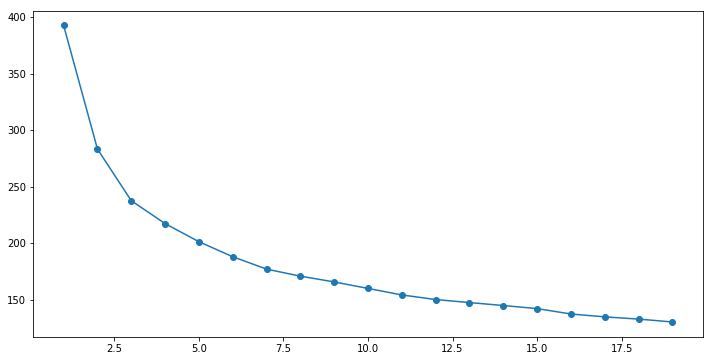

In [256]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(min_max_scaled)
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [262]:
pca = PCA(4)
X_pca = pca.fit_transform(min_max_scaled)
var_exp = pca.explained_variance_ratio_
print("Explained Variance: ", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Explained Variance: ", cum_var_exp)

Explained Variance:  [0.36368229 0.24189893 0.10252311 0.07672073]
Cumulative Explained Variance:  [0.36368229 0.60558122 0.70810433 0.78482507]


In [265]:
for n_clusters in range(5, 15):
    clusterer = KMeans(n_clusters=n_clusters)
    y = clusterer.fit_predict(X_pca)

    message = "For n_clusters = {} The average silhouette_score is: {}"
    print(message.format(n_clusters, round(silhouette_score(X, y), 4)))

For n_clusters = 5 The average silhouette_score is: 0.1728
For n_clusters = 6 The average silhouette_score is: 0.1877
For n_clusters = 7 The average silhouette_score is: 0.1609
For n_clusters = 8 The average silhouette_score is: 0.1393
For n_clusters = 9 The average silhouette_score is: 0.1429
For n_clusters = 10 The average silhouette_score is: 0.1243
For n_clusters = 11 The average silhouette_score is: 0.1286
For n_clusters = 12 The average silhouette_score is: 0.0985
For n_clusters = 13 The average silhouette_score is: 0.101
For n_clusters = 14 The average silhouette_score is: 0.1055


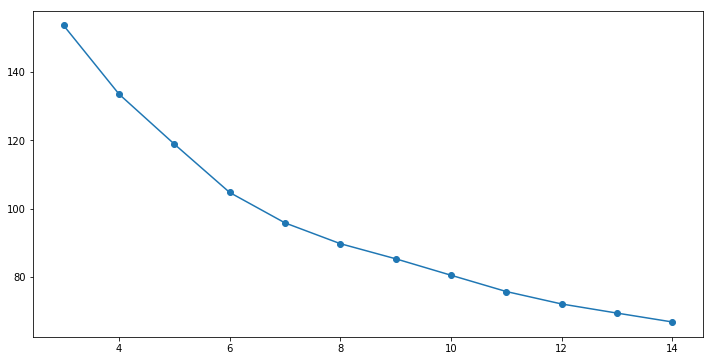

In [268]:
cluster_range = range( 3, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_pca)
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [269]:
## looking at each cluster differences

In [271]:
X.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,30.9,0.5,0.8,6.7,-1.0,4.9,10.6,109.0,11.6,0.439,26.4,9.2,0.916,10.0,7.7,1.2,2.6,120.0,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,0.594,30.6
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,11.7,2.6,4.3,0.3,2.8,12.4,26.9,101.0,11.4,0.505,22.7,4.1,0.630,6.5,-2.6,4.5,10.0,102.0,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,0.528,26.4
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,1.0,1.6,1.1,1.9,10.3,22.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,-0.8,2.3,5.2,105.0,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,0.522,14.8
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,12.4,0.7,1.2,-1.8,0.6,5.2,11.4,109.0,6.3,0.447,14.1,2.2,0.850,2.6,-2.4,0.7,1.6,103.0,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,0.520,15.6


In [272]:
X_scaled = ss.fit_transform(X)

In [273]:
kmeans= KMeans(n_clusters=8)
kmeans.fit(X_scaled)
X['cluster_scaled'] = kmeans.labels_
Counter(kmeans.labels_)

Counter({1: 48, 4: 21, 3: 31, 5: 47, 0: 26, 7: 54, 2: 49, 6: 38})

In [278]:
X.shape

(314, 37)

In [291]:
X[X['cluster_scaled']==0]

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%,cluster_scaled
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Shabazz Napier,4.6,0.450,10.1,2.7,0.376,7.1,4.9,14.6,0.5,0.7,0.2,0.3,4.7,10.1,106.0,7.2,0.420,17.2,3.8,0.841,4.5,-0.2,0.8,1.9,107.0,14.2,2.7,20.9,2.6,2.6,2.9,13.2,5.5,6.0,0.544,19.5,0
Joe Ingles,2.5,0.516,4.9,4.0,0.440,9.0,7.6,22.9,0.4,0.7,3.1,1.0,6.2,13.9,106.0,6.5,0.467,14.0,1.3,0.795,1.6,2.1,0.5,1.1,115.0,14.4,3.5,18.3,1.8,1.8,3.1,17.4,6.7,7.6,0.623,15.9,0
Ricky Rubio,5.6,0.451,12.3,2.1,0.352,6.1,9.1,28.4,0.2,0.4,1.7,1.6,6.8,15.3,103.0,7.7,0.418,18.4,4.9,0.866,5.7,0.1,1.0,2.2,105.0,15.4,4.6,22.4,2.7,2.7,4.6,18.1,7.8,8.8,0.537,22.9,0
Tyus Jones,3.6,0.528,6.8,1.5,0.349,4.4,7.9,21.2,0.2,0.4,0.5,-0.3,4.0,9.2,110.0,5.1,0.457,11.2,2.4,0.877,2.8,0.8,0.5,1.2,119.0,14.1,3.7,14.2,3.2,3.2,2.0,14.0,4.5,5.2,0.572,12.7,0
Draymond Green,4.3,0.562,7.6,1.6,0.301,5.4,10.7,29.0,1.9,3.1,3.2,2.7,9.7,21.1,105.0,5.9,0.454,13.0,2.8,0.775,3.6,0.4,1.6,3.9,110.0,16.1,3.9,16.3,2.0,2.0,4.3,22.5,11.3,13.1,0.556,17.2,0
Lonzo Ball,3.0,0.420,7.2,2.4,0.305,7.9,10.1,29.2,1.2,2.0,1.7,2.5,7.8,17.3,106.0,5.5,0.360,15.2,0.9,0.451,1.9,-0.8,1.9,4.2,97.0,12.5,3.1,14.2,2.4,2.4,3.7,18.6,9.7,10.8,0.444,17.4,0
Rajon Rondo,5.1,0.526,9.6,1.4,0.333,4.2,14.9,42.2,0.3,0.5,-1.1,-0.7,6.5,14.2,109.0,6.5,0.468,13.8,0.7,0.543,1.3,-0.4,0.9,2.0,109.0,15.3,3.3,15.0,2.0,2.0,4.2,22.7,7.4,8.4,0.522,16.9,0
Kyle Anderson,5.4,0.556,9.7,0.5,0.333,1.5,5.2,14.7,1.5,2.5,4.1,4.3,8.0,17.6,101.0,5.9,0.527,11.2,2.7,0.712,3.7,-0.3,2.1,4.7,114.0,15.9,2.9,14.9,2.9,2.9,2.4,15.8,10.1,11.1,0.582,13.5,0
Dejounte Murray,7.6,0.454,16.7,0.3,0.265,1.0,6.7,20.2,0.9,1.5,1.2,3.4,10.1,22.4,101.0,7.8,0.443,17.7,3.0,0.709,4.3,-2.2,3.2,7.0,99.0,15.1,4.4,19.0,2.8,2.8,3.9,16.6,13.3,14.6,0.485,20.7,0


In [287]:
import seaborn as sns

In [289]:
X[X['cluster_scaled']==1]

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%,cluster_scaled
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5,1
Carmelo Anthony,6.0,0.437,13.8,3.4,0.357,9.4,2.0,6.5,1.0,1.8,-3.8,-1.9,7.7,17.7,109.0,9.4,0.404,23.2,2.9,0.767,3.8,-1.9,1.3,2.9,104.0,12.7,3.9,25.0,0.9,0.9,2.0,7.3,9.0,10.0,0.503,23.2,1
Alec Burks,5.8,0.452,12.9,2.2,0.331,6.7,3.2,10.0,0.4,0.6,-2.8,-0.3,8.2,18.4,105.0,8.1,0.411,19.6,5.1,0.863,5.9,-2.5,0.9,2.1,102.0,13.1,3.6,23.4,1.8,1.8,2.8,11.4,9.1,10.3,0.527,22.5,1
Andrew Wiggins,7.7,0.475,16.1,1.9,0.331,5.7,2.7,8.2,0.9,1.5,-2.5,-1.4,4.6,10.8,113.0,9.6,0.438,21.8,3.4,0.643,5.3,-1.1,1.4,3.1,101.0,13.0,2.7,24.4,1.5,1.5,2.3,8.8,6.0,6.9,0.505,23.4,1
Will Barton,5.7,0.510,11.2,2.9,0.370,7.8,6.1,18.5,1.0,1.6,1.0,-0.6,6.3,14.2,112.0,8.6,0.452,19.0,3.4,0.805,4.2,1.6,1.3,3.0,113.0,16.2,3.1,23.4,1.5,1.5,2.8,11.7,7.6,8.6,0.562,20.7,1
Jamal Murray,6.1,0.502,12.1,3.2,0.378,8.4,5.3,16.4,0.5,0.9,-0.2,-2.0,4.2,9.4,113.0,9.3,0.451,20.5,4.4,0.905,4.9,1.8,1.6,3.6,112.0,16.1,3.3,26.1,1.5,1.5,3.3,12.8,5.7,6.5,0.576,22.8,1
Gary Harris,6.1,0.553,11.1,3.4,0.396,8.5,4.2,13.0,0.3,0.5,0.9,-1.5,3.0,6.8,112.0,9.5,0.485,19.5,2.9,0.827,3.5,2.4,0.8,1.8,115.0,16.5,2.6,25.2,2.6,2.6,2.6,10.8,3.8,4.3,0.597,20.7,1
Trey Lyles,6.7,0.563,11.8,3.0,0.381,7.8,3.2,10.1,1.2,2.0,-0.8,-1.4,10.4,23.5,110.0,9.6,0.491,19.6,3.6,0.706,5.1,0.6,2.0,4.5,116.0,17.9,4.0,25.8,1.1,1.1,2.2,9.0,12.4,14.0,0.591,21.1,1
Klay Thompson,6.7,0.526,12.7,4.4,0.440,10.0,3.6,11.2,0.7,1.1,-0.6,-2.4,4.7,10.3,111.0,11.1,0.488,22.7,1.6,0.837,1.9,1.8,0.6,1.5,110.0,16.1,2.3,28.1,1.1,1.1,2.5,9.5,5.3,6.2,0.598,23.7,1


In [290]:
## really do not like my scores for the clusters 
## what if I seperated and cluster based on position and within those position get clusters.

In [292]:
season17_18.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,GS,Games,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,USG%
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CJ McCollum,8.1,0.465,17.5,3.2,0.397,8.1,4.6,15.8,0.6,1.0,0.4,-1.0,4.6,9.9,109.0,11.4,0.443,25.6,3.6,0.836,4.3,81.0,81.0,2923.0,1.4,0.9,2.0,108.0,17.0,2.9,29.5,1.3,1.3,2.6,8.6,5.5,6.0,0.536,26.5
Damian Lillard,7.3,0.501,14.6,4.2,0.361,11.7,9.0,30.9,0.5,0.8,6.7,-1.0,4.9,10.6,109.0,11.6,0.439,26.4,9.2,0.916,10.0,73.0,73.0,2670.0,7.7,1.2,2.6,120.0,25.2,2.2,36.6,1.4,1.4,3.8,11.1,6.1,6.6,0.594,30.6
Jusuf Nurkic,11.4,0.508,22.5,0.0,0.000,0.2,3.4,11.7,2.6,4.3,0.3,2.8,12.4,26.9,101.0,11.4,0.505,22.7,4.1,0.630,6.5,79.0,79.0,2088.0,-2.6,4.5,10.0,102.0,19.2,5.9,27.0,1.5,1.5,4.4,14.6,16.9,18.5,0.528,26.4
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,1.0,1.6,1.1,1.9,10.3,22.3,104.0,5.5,0.395,14.0,1.4,0.738,1.9,67.0,69.0,2072.0,-0.8,2.3,5.2,105.0,12.0,3.3,15.5,1.9,1.9,1.9,11.3,12.6,13.8,0.522,14.8
Evan Turner,5.3,0.485,10.9,1.0,0.318,3.2,4.2,12.4,0.7,1.2,-1.8,0.6,5.2,11.4,109.0,6.3,0.447,14.1,2.2,0.850,2.6,40.0,79.0,2034.0,-2.4,0.7,1.6,103.0,9.9,4.0,15.9,1.1,1.1,2.4,13.7,6.0,6.5,0.520,15.6


In [293]:
season17_18.shape

(314, 39)

In [ ]:
players = []
for team in all_teams:
    team_url = 'https://www.basketball-reference.com/teams/'+team+'/2018.html'
    res = requests.get(team_url).content.decode('utf-8')
    clean_soup = BeautifulSoup(re.sub("<!--|-->","",res), 'lxml')
    table3 = clean_soup.find('table', {'id': 'roster'})
    table3 = table3.find('tbody')
    

    for row3 in table3.find_all('tr'):
        player = {}
        # for position
        player['Name'] = row3.find('td', {'class': 'left', 'data-stat': 'player'}).text
        player['POS'] = row3.find('td', {'class': 'center', 'data-stat': 'pos'}).text
    
        players.append(players)
pd.DataFrame(players)

In [294]:
table3 = clean_soup.find('table', {'id': 'roster'})
table3 = table3.find('tbody')

In [297]:
table3.find('tr')

<tr><th class="center " data-stat="number" scope="row">8</th><td class="left " csk="Babbitt,Luke" data-append-csv="babbilu01" data-stat="player"><a href="/players/b/babbilu01.html">Luke Babbitt</a></td><td class="center " csk="3" data-stat="pos">SF</td><td class="right " csk="81.0" data-stat="height">6-9</td><td class="right " data-stat="weight">225</td><td class="left " csk="19890620" data-stat="birth_date">June 20, 1989</td><td class="right " data-stat="birth_country"><span class="f-i f-us">us</span></td><td class="right " csk="7" data-stat="years_experience">7</td><td class="left " data-stat="college"><a href="/friv/colleges.fcgi?college=nevada">University of Nevada, Reno</a></td></tr>